In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
print("Loading Heart Disease Dataset...")
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:
        print(f"  Values: {df[col].unique()}")
    print()


Loading Heart Disease Dataset...
Dataset Shape: (1025, 14)

First few rows:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0      

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

print("Starting data cleaning process...")
print("Original shape:", df.shape)

# Create a copy for cleaning
df_clean = df.copy()

# Convert data types based on the actual data
print("\nConverting data types...")

# Convert numeric columns that are stored as strings/objects
numeric_columns = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'target']

for col in numeric_columns:
    if col in df_clean.columns:
        # Convert to numeric, handling any non-numeric values
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f"Converted {col} to numeric")

print("\nData types after conversion:")
print(df_clean.dtypes)

print("\nMissing values after conversion:")
missing_values = df_clean.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing values
if df_clean.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # For numeric columns, fill with median
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in {col} with median: {median_val}")
    
    # For categorical columns, fill with mode
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"Filled missing values in {col} with mode: {mode_val}")

print("\nFinal missing values check:")
print(df_clean.isnull().sum().sum())

# Display basic statistics
print("\nBasic statistics for numeric columns:")
print(df_clean.describe())

print("\nCategorical columns value counts:")
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())

# Save cleaned dataset
df_clean.to_csv('heart_disease_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'heart_disease_cleaned.csv'")
print("Final dataset shape:", df_clean.shape)


Starting data cleaning process...
Original shape: (1025, 14)

Converting data types...
Converted age to numeric
Converted resting_blood_pressure to numeric
Converted cholestoral to numeric
Converted Max_heart_rate to numeric
Converted oldpeak to numeric
Converted target to numeric

Data types after conversion:
age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

Missing values after conversion:
Series([], dtype: int64)

Final missing values check:
0

Basic sta

Exploratory Data Analysis - Heart Disease Dataset
Dataset shape: (1025, 14)
Target distribution:
target
1    526
0    499
Name: count, dtype: int64
Target distribution (%):
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


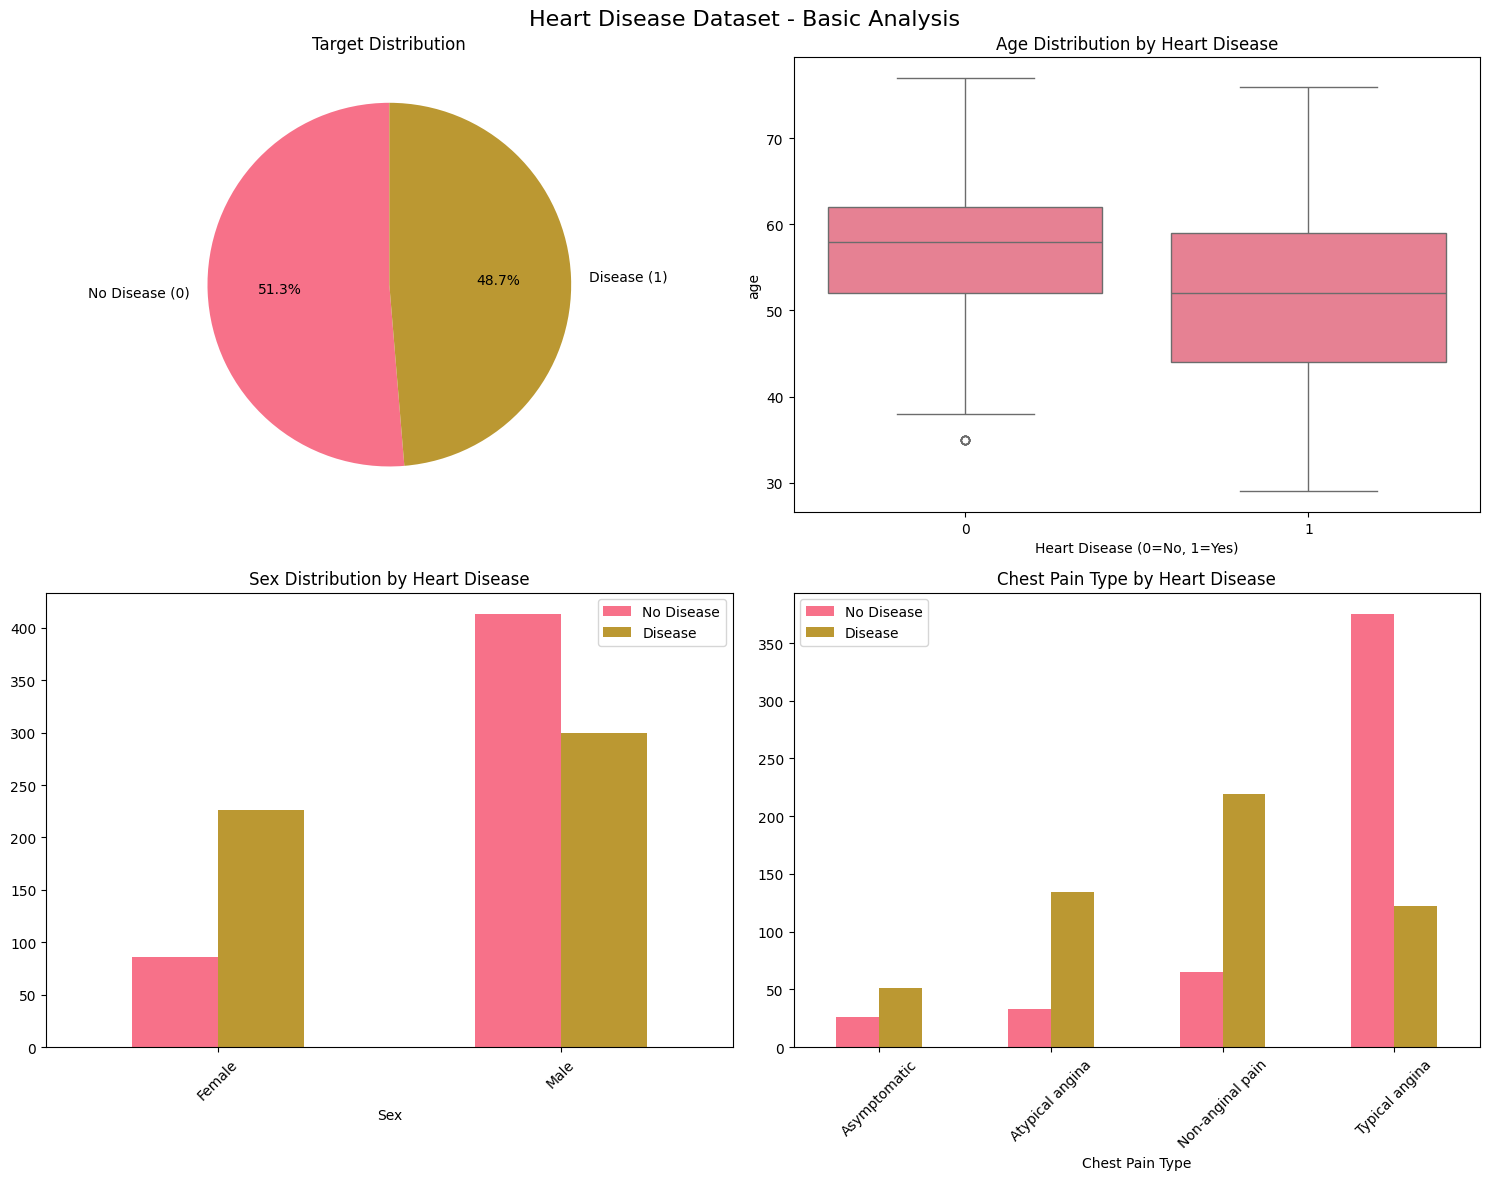


Correlation Analysis:


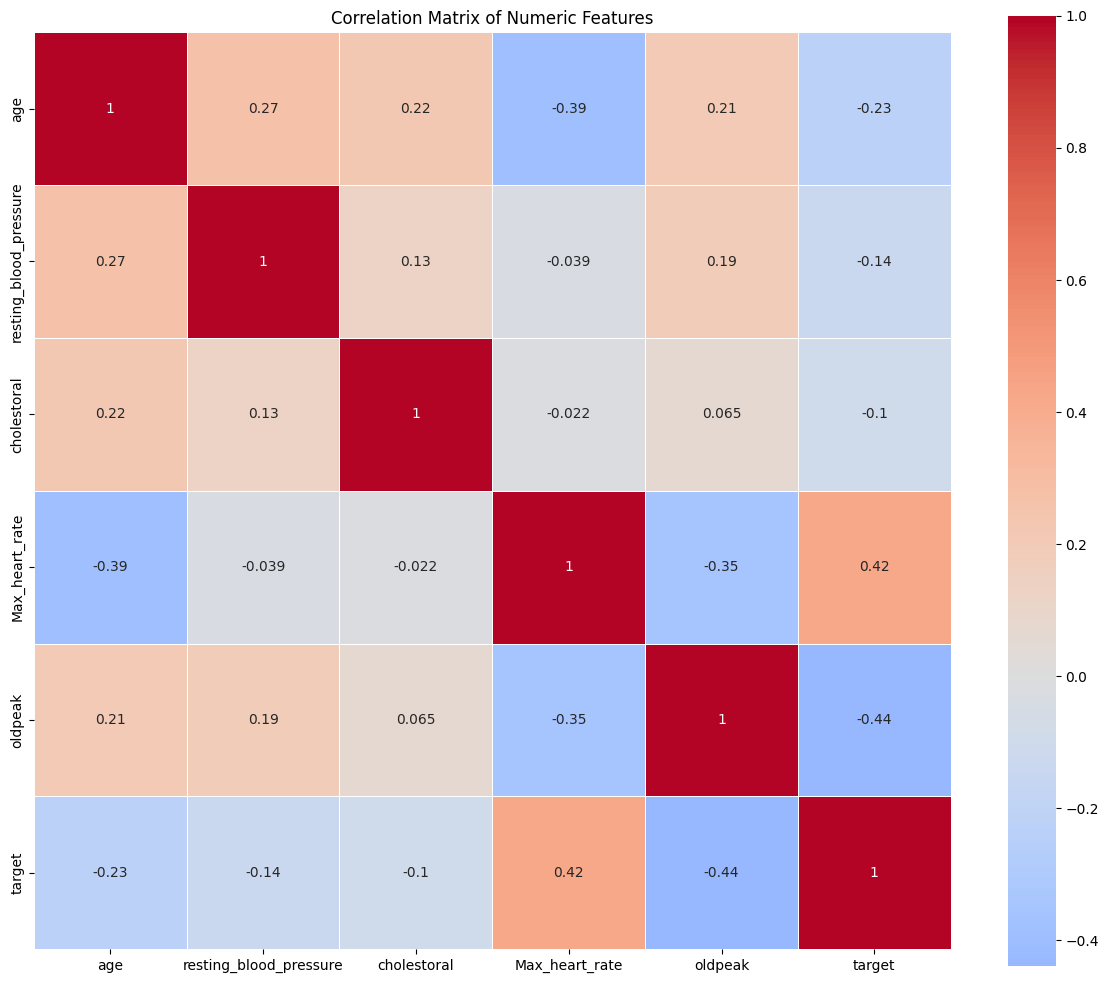


Feature Analysis with Target:
------------------------------

AGE:
Overall mean: 54.43
No disease mean: 56.57
Disease mean: 52.41
T-test p-value: 0.0000

RESTING_BLOOD_PRESSURE:
Overall mean: 131.61
No disease mean: 134.11
Disease mean: 129.25
T-test p-value: 0.0000

CHOLESTORAL:
Overall mean: 246.00
No disease mean: 251.29
Disease mean: 240.98
T-test p-value: 0.0014

MAX_HEART_RATE:
Overall mean: 149.11
No disease mean: 139.13
Disease mean: 158.59
T-test p-value: 0.0000

OLDPEAK:
Overall mean: 1.07
No disease mean: 1.60
Disease mean: 0.57
T-test p-value: 0.0000

Categorical Features Analysis:
------------------------------

SEX:
target    0    1
sex             
Female   86  226
Male    413  300
Percentages:
target      0      1
sex                 
Female  27.56  72.44
Male    57.92  42.08

CHEST_PAIN_TYPE:
target              0    1
chest_pain_type           
Asymptomatic       26   51
Atypical angina    33  134
Non-anginal pain   65  219
Typical angina    375  122
Percentages:
tar

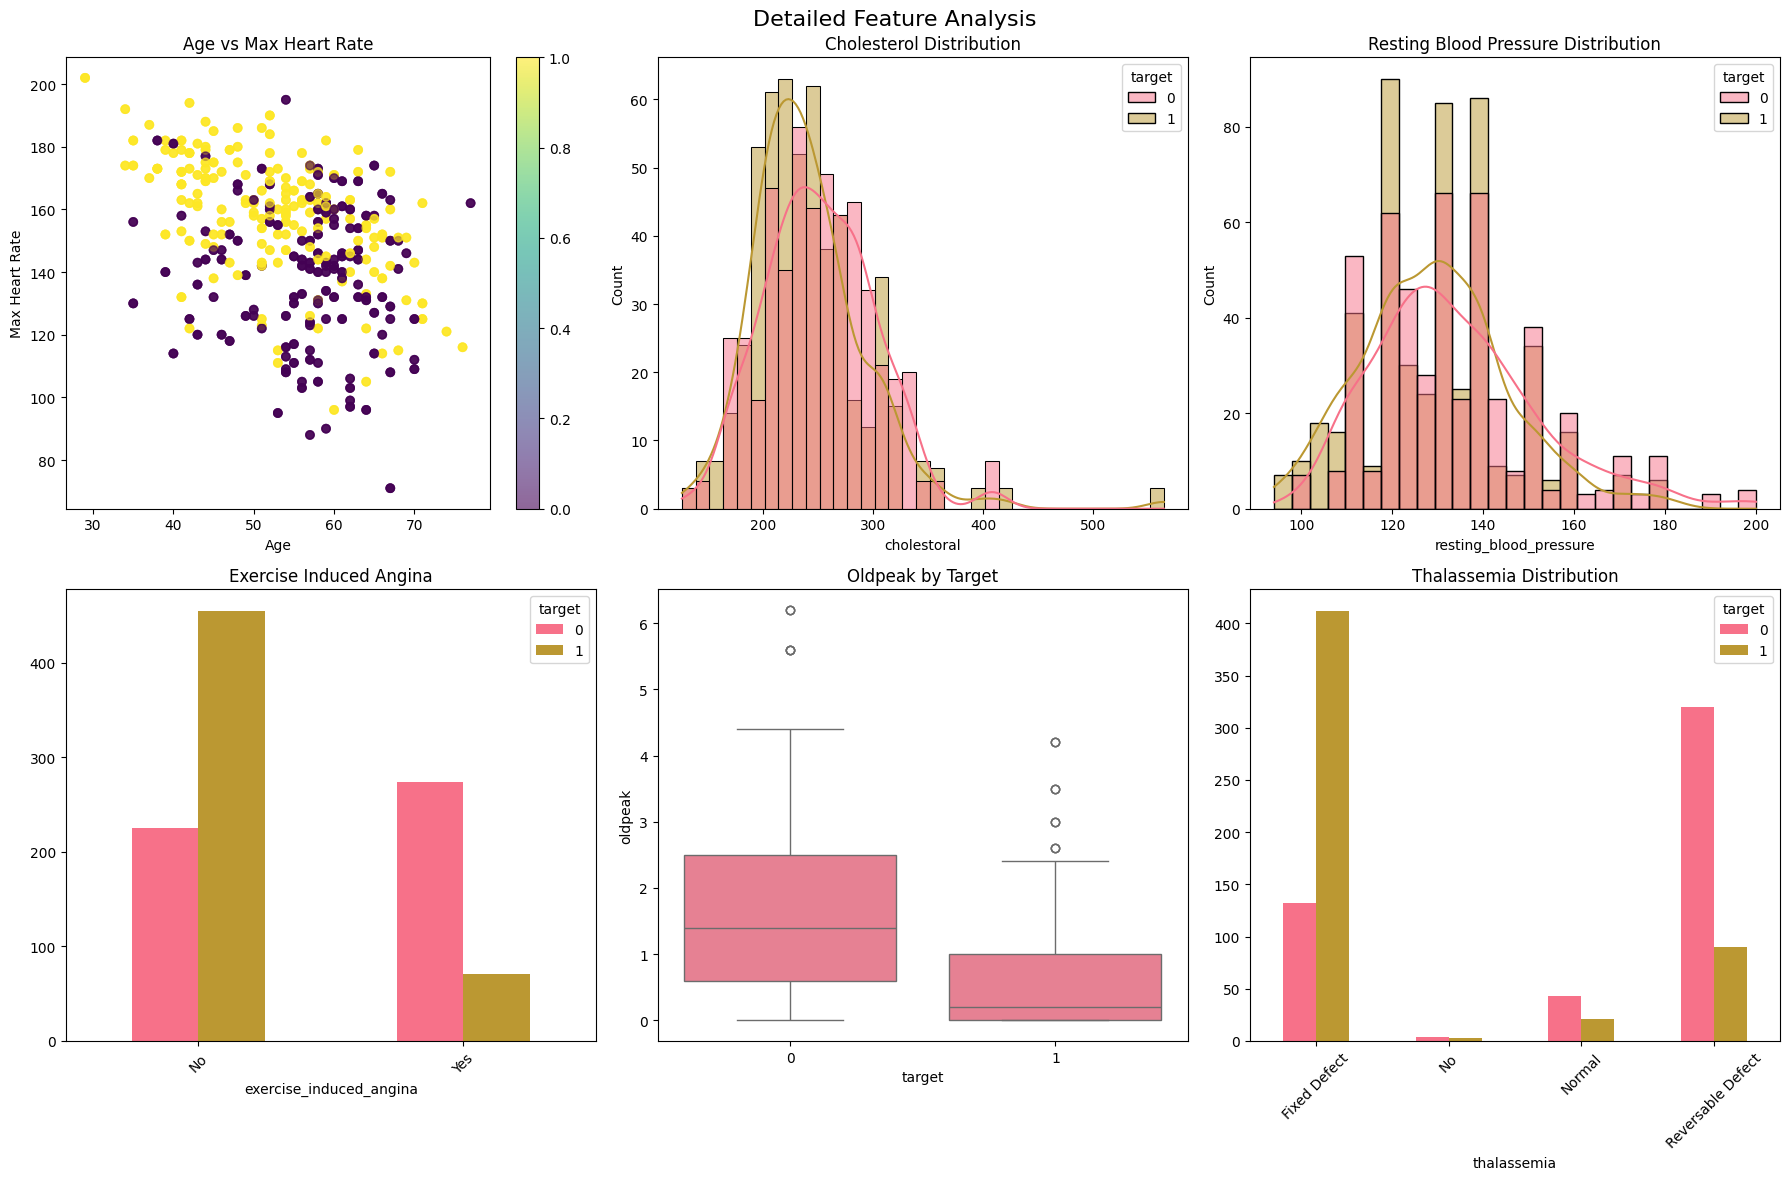


Key Insights from EDA:
1. Target distribution shows the dataset is relatively balanced
2. Age, max heart rate, and oldpeak show significant differences between groups
3. Chest pain type and exercise induced angina are strong predictors
4. Males appear to have higher risk in this dataset
5. Thalassemia and number of vessels colored by fluoroscopy are important factors


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Load cleaned dataset
df = pd.read_csv('heart_disease_cleaned.csv')

print("Exploratory Data Analysis - Heart Disease Dataset")
print("=" * 50)

# Basic information
print(f"Dataset shape: {df.shape}")
print(f"Target distribution:")
print(df['target'].value_counts())
print(f"Target distribution (%):")
print(df['target'].value_counts(normalize=True) * 100)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Heart Disease Dataset - Basic Analysis', fontsize=16)

# 1. Target distribution
axes[0, 0].pie(df['target'].value_counts(), labels=['No Disease (0)', 'Disease (1)'], 
               autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Target Distribution')

# 2. Age distribution by target
sns.boxplot(data=df, x='target', y='age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Heart Disease')
axes[0, 1].set_xlabel('Heart Disease (0=No, 1=Yes)')

# 3. Sex distribution by target
sex_target = pd.crosstab(df['sex'], df['target'])
sex_target.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Sex Distribution by Heart Disease')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].legend(['No Disease', 'Disease'])
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Chest pain type distribution
chest_pain_target = pd.crosstab(df['chest_pain_type'], df['target'])
chest_pain_target.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Chest Pain Type by Heart Disease')
axes[1, 1].set_xlabel('Chest Pain Type')
axes[1, 1].legend(['No Disease', 'Disease'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlation analysis for numeric features
print("\nCorrelation Analysis:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Feature analysis with target
print("\nFeature Analysis with Target:")
print("-" * 30)

# Numeric features analysis
numeric_features = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

for feature in numeric_features:
    if feature in df.columns:
        print(f"\n{feature.upper()}:")
        print(f"Overall mean: {df[feature].mean():.2f}")
        print(f"No disease mean: {df[df['target']==0][feature].mean():.2f}")
        print(f"Disease mean: {df[df['target']==1][feature].mean():.2f}")
        
        # Statistical test
        no_disease = df[df['target']==0][feature]
        disease = df[df['target']==1][feature]
        t_stat, p_value = stats.ttest_ind(no_disease, disease)
        print(f"T-test p-value: {p_value:.4f}")

# Categorical features analysis
print("\nCategorical Features Analysis:")
print("-" * 30)

categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

for feature in categorical_features:
    if feature in df.columns:
        print(f"\n{feature.upper()}:")
        crosstab = pd.crosstab(df[feature], df['target'])
        print(crosstab)
        
        # Calculate percentages
        percentages = pd.crosstab(df[feature], df['target'], normalize='index') * 100
        print("Percentages:")
        print(percentages.round(2))

# Advanced visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Detailed Feature Analysis', fontsize=16)

# Max heart rate vs age colored by target
scatter = axes[0, 0].scatter(df['age'], df['Max_heart_rate'], c=df['target'], 
                            cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Max Heart Rate')
axes[0, 0].set_title('Age vs Max Heart Rate')
plt.colorbar(scatter, ax=axes[0, 0])

# Cholesterol distribution
sns.histplot(data=df, x='cholestoral', hue='target', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Cholesterol Distribution')

# Resting blood pressure distribution
sns.histplot(data=df, x='resting_blood_pressure', hue='target', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Resting Blood Pressure Distribution')

# Exercise induced angina
exercise_counts = pd.crosstab(df['exercise_induced_angina'], df['target'])
exercise_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Exercise Induced Angina')
axes[1, 0].tick_params(axis='x', rotation=45)

# Oldpeak distribution
sns.boxplot(data=df, x='target', y='oldpeak', ax=axes[1, 1])
axes[1, 1].set_title('Oldpeak by Target')

# Thalassemia distribution
thal_counts = pd.crosstab(df['thalassemia'], df['target'])
thal_counts.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Thalassemia Distribution')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nKey Insights from EDA:")
print("1. Target distribution shows the dataset is relatively balanced")
print("2. Age, max heart rate, and oldpeak show significant differences between groups")
print("3. Chest pain type and exercise induced angina are strong predictors")
print("4. Males appear to have higher risk in this dataset")
print("5. Thalassemia and number of vessels colored by fluoroscopy are important factors")


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('heart_disease_cleaned.csv')

print("Model Training - Heart Disease Prediction")
print("=" * 50)

# Prepare the data
print("Preparing data for modeling...")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Handle categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_columns)}")

# Create label encoders for categorical variables
label_encoders = {}
X_encoded = X.copy()

for col in categorical_columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
results = {}

print("\nTraining Models...")
print("-" * 30)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression, original for tree-based models
    if name == 'Logistic Regression':
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Train the model
    model.fit(X_train_model, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='accuracy')
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Display results summary
print("\nModel Comparison:")
print("-" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'ROC-AUC': [results[model]['roc_auc'] for model in results.keys()],
    'CV Mean': [results[model]['cv_mean'] for model in results.keys()],
    'CV Std': [results[model]['cv_std'] for model in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Best ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

# Detailed evaluation for best model
print(f"\nDetailed Evaluation for {best_model_name}:")
print("-" * 40)
print("Classification Report:")
print(classification_report(y_test, results[best_model_name]['y_pred']))

# Save results for visualization
import pickle
with open('model_results.pkl', 'wb') as f:
    pickle.dump({
        'results': results,
        'best_model_name': best_model_name,
        'X_test': X_test,
        'y_test': y_test,
        'feature_names': list(X_encoded.columns),
        'label_encoders': label_encoders,
        'scaler': scaler
    }, f)

print("\nModel training completed. Results saved for visualization.")


Model Training - Heart Disease Prediction
Preparing data for modeling...
Features shape: (1025, 13)
Target shape: (1025,)
Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
Encoded sex: {'Female': 0, 'Male': 1}
Encoded chest_pain_type: {'Asymptomatic': 0, 'Atypical angina': 1, 'Non-anginal pain': 2, 'Typical angina': 3}
Encoded fasting_blood_sugar: {'Greater than 120 mg/ml': 0, 'Lower than 120 mg/ml': 1}
Encoded rest_ecg: {'Left ventricular hypertrophy': 0, 'Normal': 1, 'ST-T wave abnormality': 2}
Encoded exercise_induced_angina: {'No': 0, 'Yes': 1}
Encoded slope: {'Downsloping': 0, 'Flat': 1, 'Upsloping': 2}
Encoded vessels_colored_by_flourosopy: {'Four': 0, 'One': 1, 'Three': 2, 'Two': 3, 'Zero': 4}
Encoded thalassemia: {'Fixed Defect': 0, 'No': 1, 'Normal': 2, 'Reversable Defect': 3}

Training set size: 820
Test set size: 205

Training Models...
-----------------------